In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## OMP Particles

In [2]:
omp_particles = pd.read_csv('Results2.0/omp_particles')

In [117]:
omp_particles.head()

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,32,2000,128,582259.067316,1000,305.425,0.305425
1,32,2000,64,317450.379504,672,102.576,0.152643
2,32,2000,32,150579.453378,303,42.081,0.138881
3,32,2000,16,73356.775369,161,15.315,0.095126
4,32,2000,8,36734.420780,103,8.375,0.081315


In [10]:
cores = omp_particles[omp_particles[' num_particles']==128]['cores']

In [81]:
x = omp_particles[(omp_particles[' num_particles']==16)][' elapsed/gen_count'].to_list()[-1]*1000

In [82]:
omp_particles[(omp_particles[' num_particles']==16)][' elapsed/gen_count']

3     0.095126
8     0.055906
13    0.036613
18    0.039341
23    0.049016
Name:  elapsed/gen_count, dtype: float64

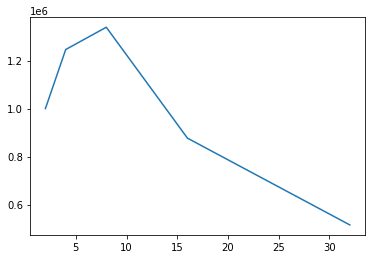

In [83]:
plt.plot(cores,x/omp_particles[omp_particles[' num_particles']==16][' elapsed/gen_count']*1000)

In [5]:
omp_particles[omp_particles[' num_particles']==128]

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,32,2000,128,582259.067316,1000,305.425,0.305425
5,16,2000,128,643567.354327,1000,400.819,0.400819
10,8,2000,128,663788.111403,1000,627.419,0.627419
15,4,2000,128,627058.197193,1000,1216.542,1.216542
20,2,2000,128,589997.516342,1000,2518.594,2.518594


### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


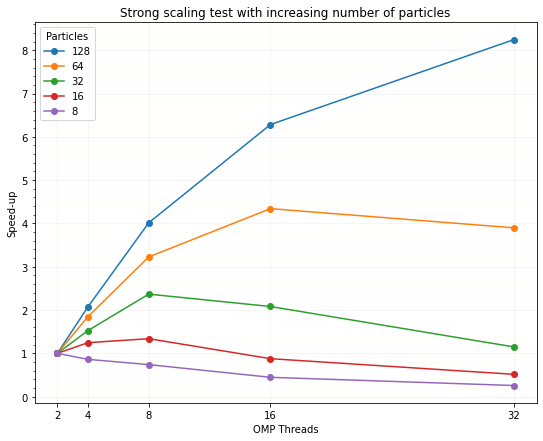

In [120]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for num_particles in omp_particles[' num_particles'].unique():
    seq_time = omp_particles[(omp_particles[' num_particles']==num_particles)][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores,seq_time/omp_particles[omp_particles[' num_particles']==num_particles][' elapsed/gen_count'], 
             marker='o')
plt.xticks(ticks = cores)
plt.legend([128,64,32,16,8],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak Scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


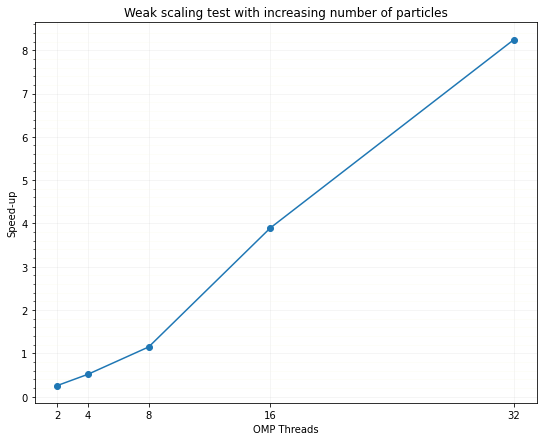

In [116]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
particles = omp_particles[' num_particles'].unique()[::-1]
for i in range(len(cores)):
    x = omp_particles[omp_particles[' num_particles']==particles[i]][' elapsed/gen_count'][(len(cores)-1)-i]
    seq_time = omp_particles[omp_particles[' num_particles']==particles[i]][' elapsed/gen_count'].to_list()[-1]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores[::-1],np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

## OMP population

## MPI particles

## MPI population